In [1]:
%matplotlib inline
import tensorflow as tf
from vahun.corpus import Corpus
import numpy as np
from vahun.tools import Timer
from vahun.tools import explog
from vahun.autoencoder import Autoencoder_ffnn
from vahun.genetic import evolution
from vahun.genetic import experiment
from vahun.tools import show_performance

encode=60
dictsize=2000000
popsize=1


config = tf.ConfigProto()
config.gpu_options.allow_growth = True
#config.gpu_options.per_process_gpu_memory_fraction=1
corp_path='/mnt/permanent/Language/Hungarian/Corp/Webkorpusz/webkorpusz.wpl'
corp=Corpus(corpus_path=corp_path,
            needed_corpus=["hun_lower_unique"],
            language="Hun",size=dictsize,encoding_len=10)
database=corp.hun_lower_unique
all_features=corp.featurize_data_charlevel_onehot(database)
train=all_features[0:int(len(all_features)*0.8)]
test=all_features[int(len(all_features)*0.8):len(all_features)]
x_train = train.reshape((len(train), np.prod(train.shape[1:])))
x_test = test.reshape((len(test), np.prod(test.shape[1:])))
print(x_train.shape)

logger=explog(encoder_type="Demo_"+str(encode),
              encoding_dim=encode,feature_len=10,
              lang="Hun",unique_words=len(set(database)),
              name="auto_demo_uni"+str(encode),population_size=popsize,
              words=len(corp.hun_lower_unique))

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

exp=experiment(encoded_width=10,layermax=10,layermin=2,maxw=10,minw=3,out_dim=360)
#exp.weights=[348, 254, 10, 254, 348, 360]
exp.weights=[180, 360]
exp.len=len(exp.weights)

Reading file, speed:  2281259.943075975  words/s
Reading file, speed:  2189032.2506568185  words/s
Corpus initalized, fields: ['hun_lower_unique'] 
Unique words:  214708
(81526, 360)


In [2]:
encoder=Autoencoder_ffnn(experiment=exp,
                 logger=logger,tf_session=sess,
                 inputdim=360,
                 layerlist=exp.weights,
                 encode_index=int(exp.len/2),
                 optimizer =tf.train.AdamOptimizer(learning_rate = 0.001),
                 nonlinear=tf.sigmoid)

In [3]:
encoder.train(x_train,x_test,512,80)

 szemlélői 	  szemlélői


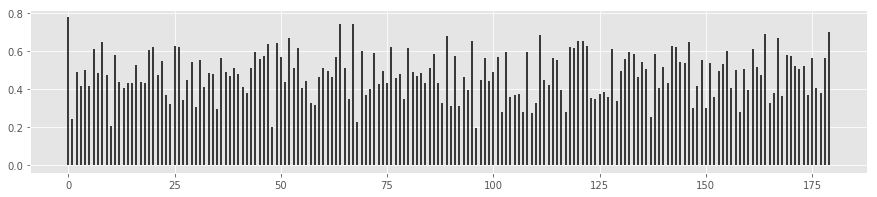

    malmát 	     malmát


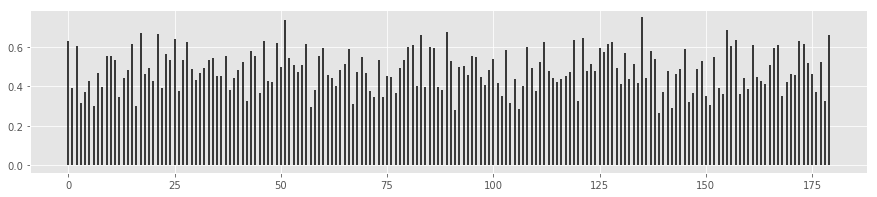

 rabjaiból 	  rabjaiból


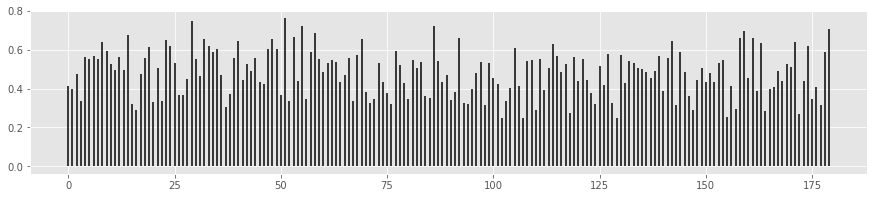

strasbourg 	 strasbourg


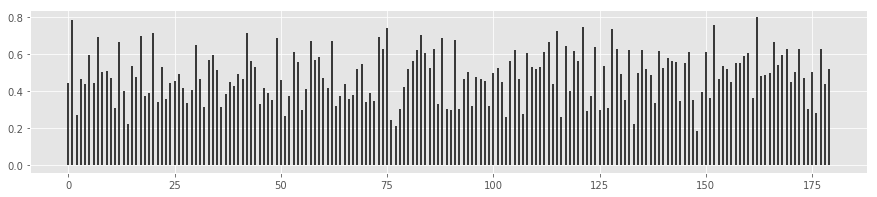

 házanépét 	  házanépét


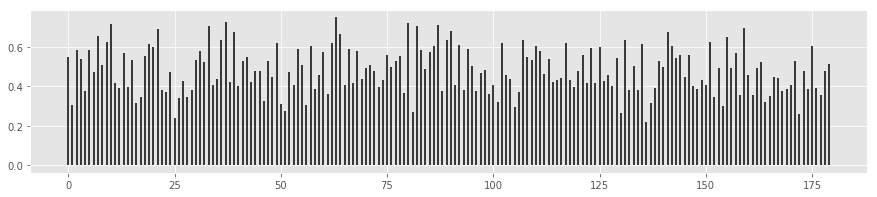

  pihentek 	   pihentek


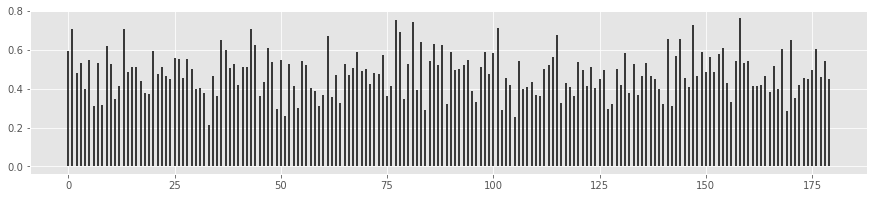

     giccs 	      gipis


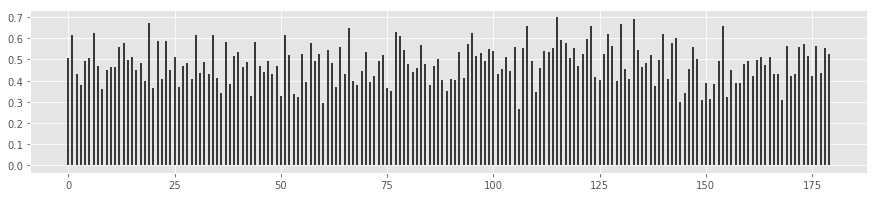

    városi 	     városi


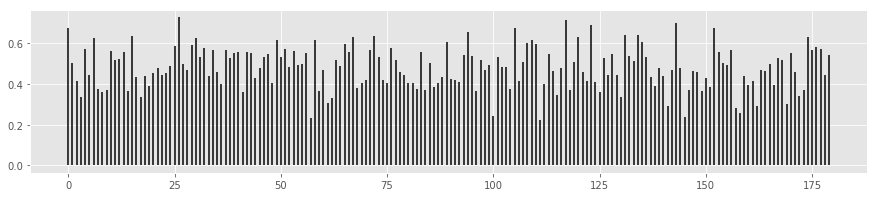

  lódítani 	   lödítani


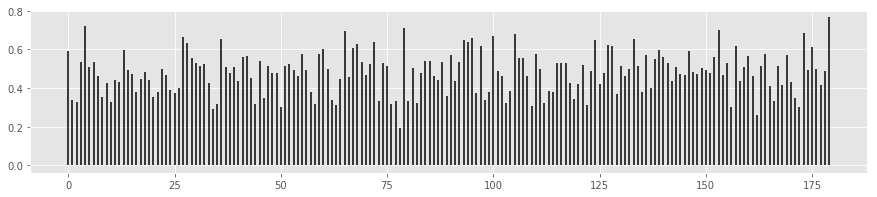

    dobogó 	     dobogó


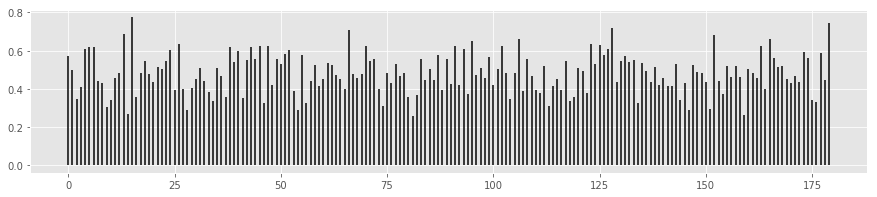

 érdemelte 	  érdemelte


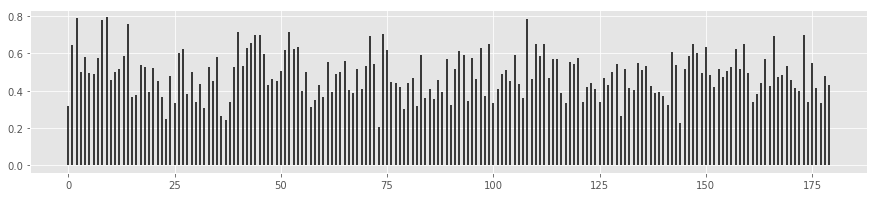

    bírunk 	     bírunk


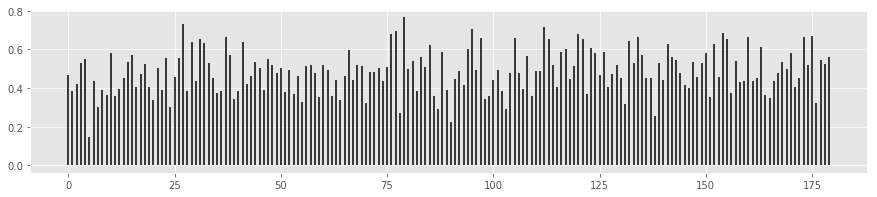

 minderről 	  minderről


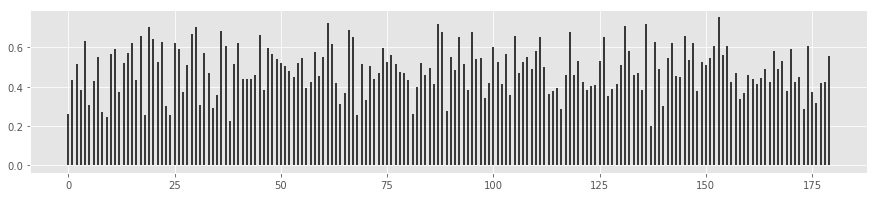

 befektető 	  befektető


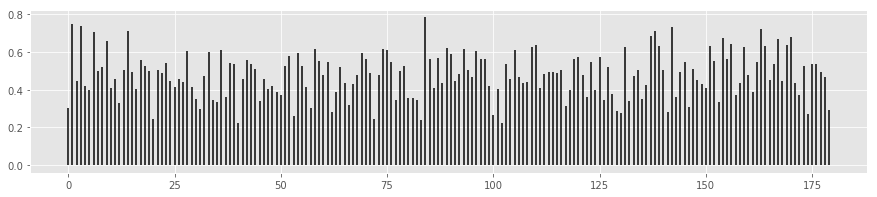

  felejtsd 	   felejtsd


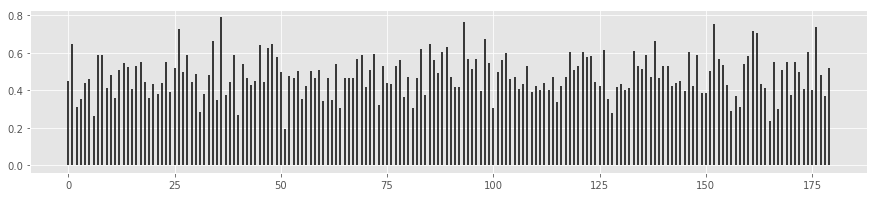

  gyanúsan 	   gyancsan


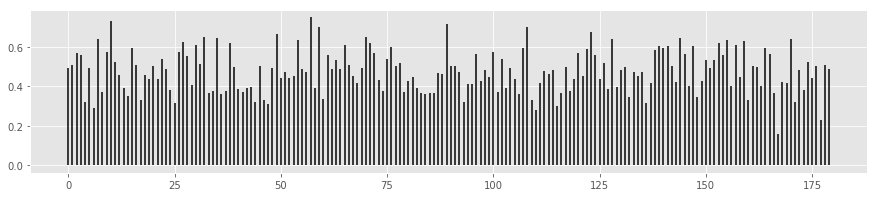

kronológia 	 kronológia


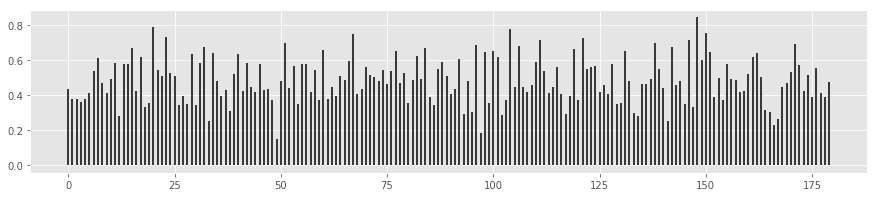

 karmaiból 	  karmaiból


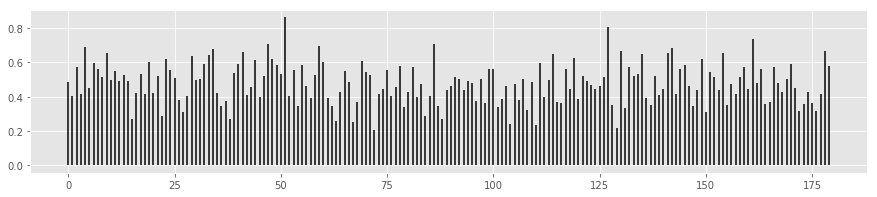

hegységben 	 hegységben


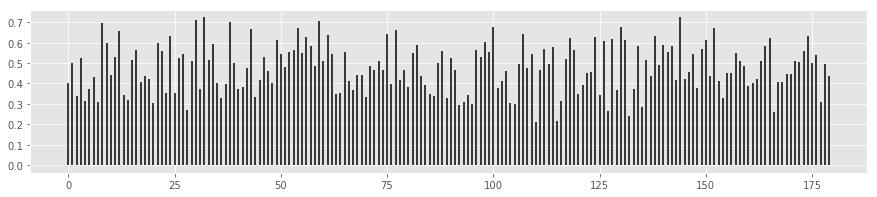

 szomjúság 	  szomjóság


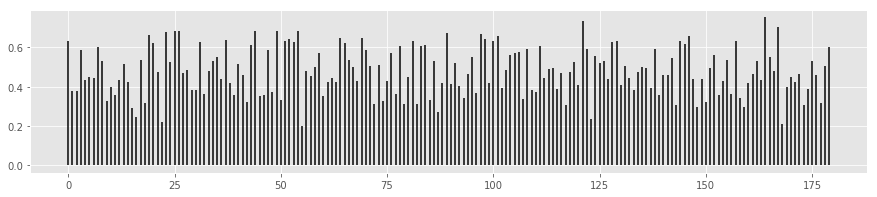

 megőrizni 	  megurizni


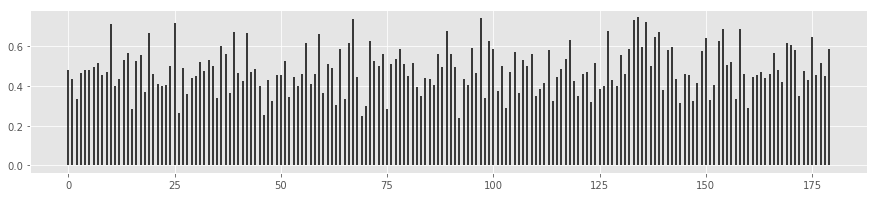

  érettség 	   érettség


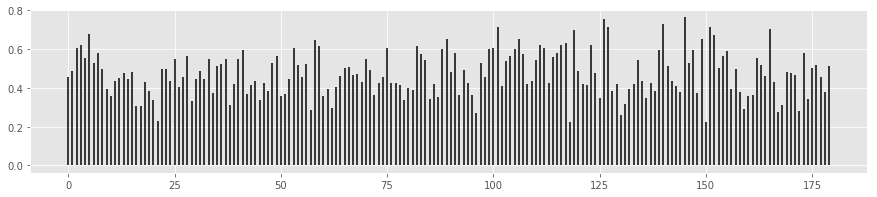

     ábrák 	      ábrák


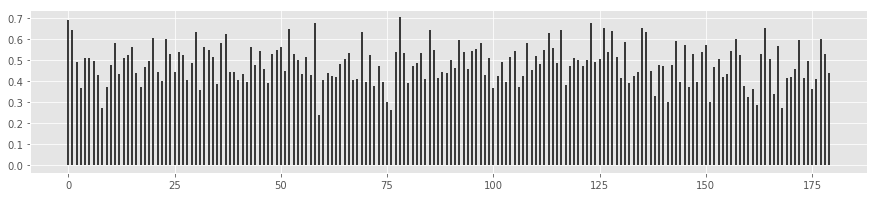

   seprűje 	    seprpje


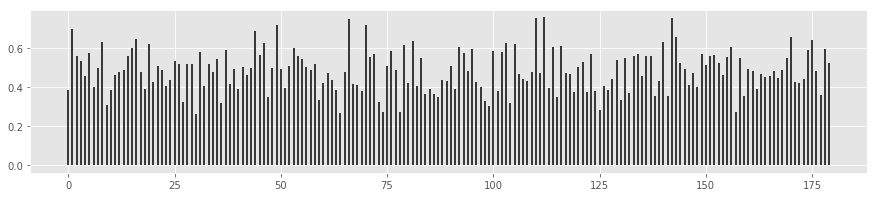

    persze 	     persze


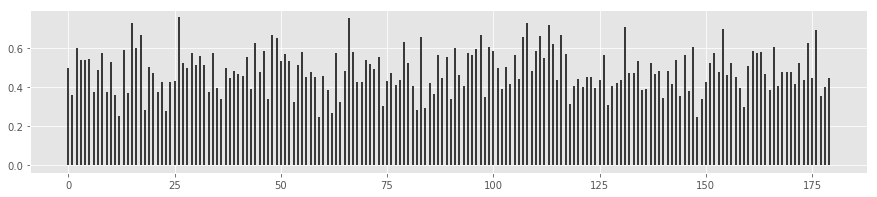

politizált 	 folitizált


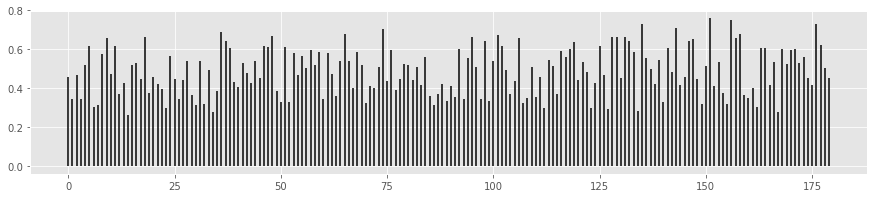

  klímával 	   klumával


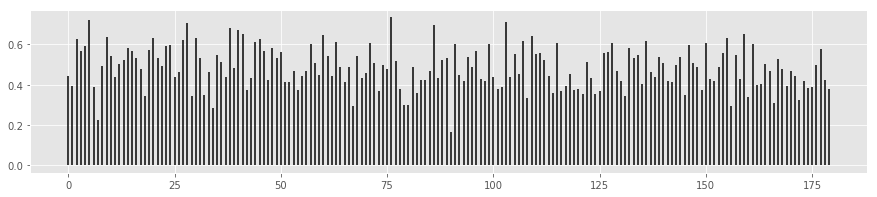

     sarok 	      sarok


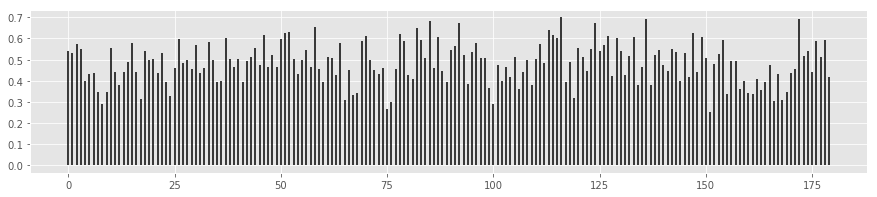

     ötlet 	      ötlet


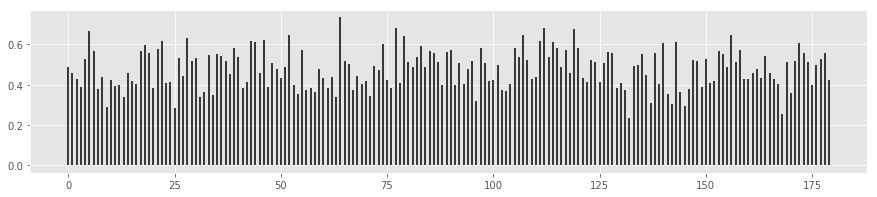

      papi 	       paji


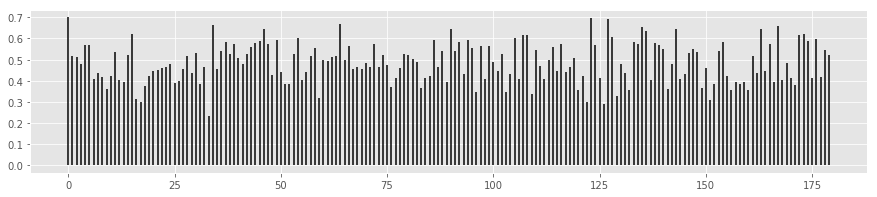

    vágány 	     vágány


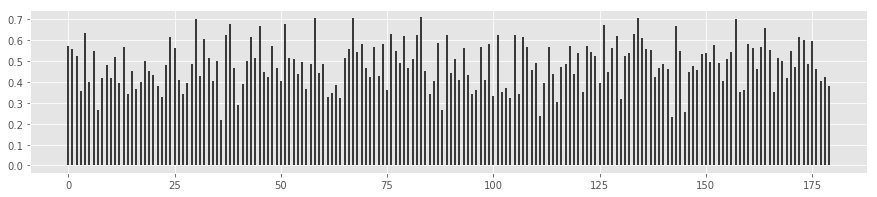

 szegényke 	  szegényke


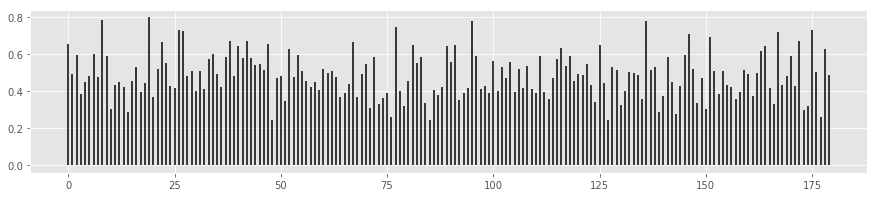

 szorzójuk 	  szorzójuk


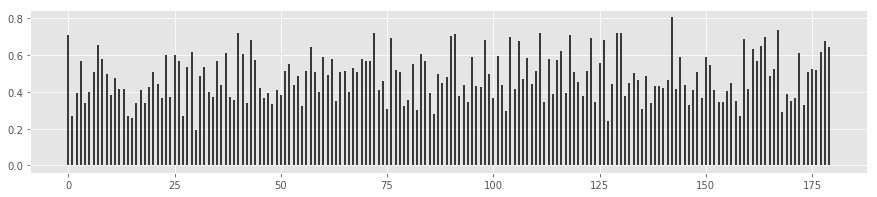

  pemetefű 	   pemetejy


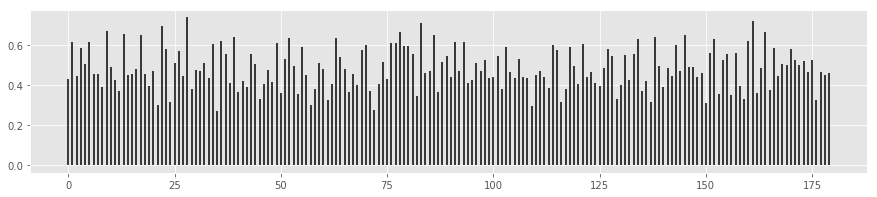

   jenőnél 	    penőnél


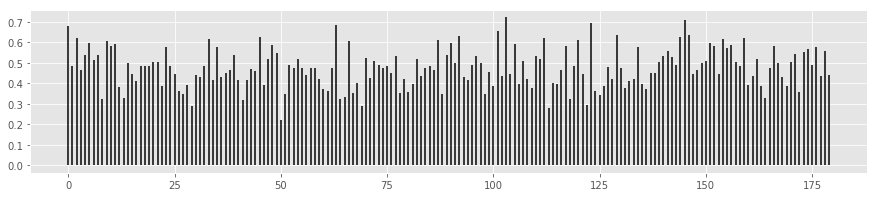

 szócsövei 	  szöcsövei


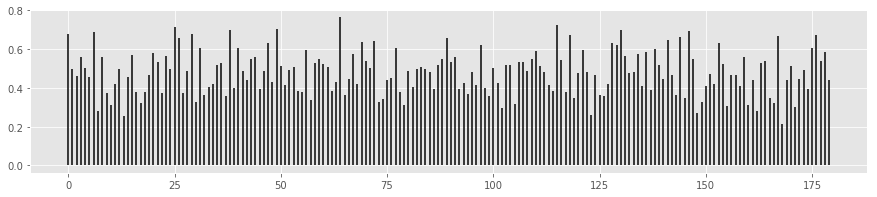

 látópálya 	  látópálya


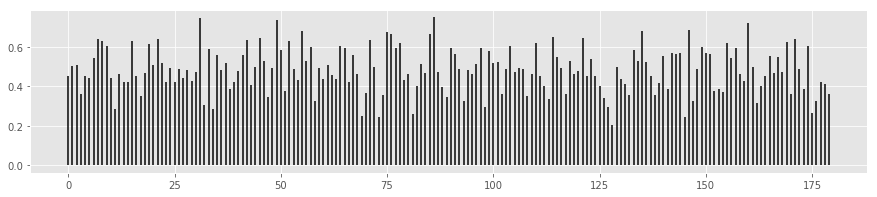

   tekinti 	    tekinti


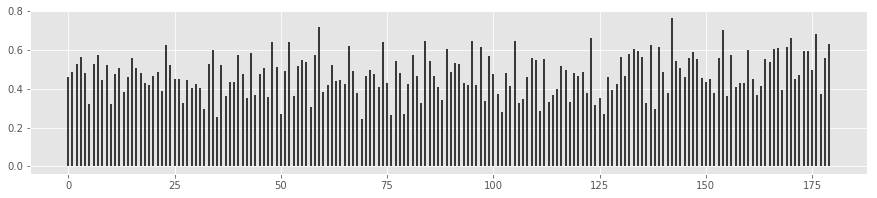

     sarja 	      sarja


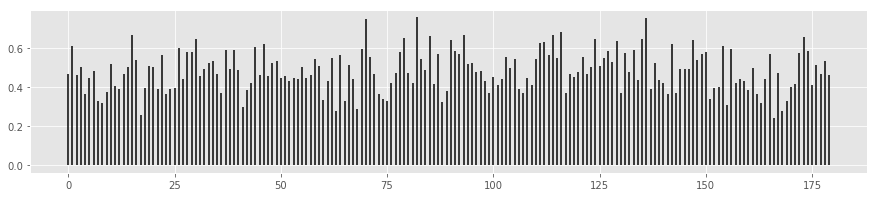

felolvasta 	 felolvasta


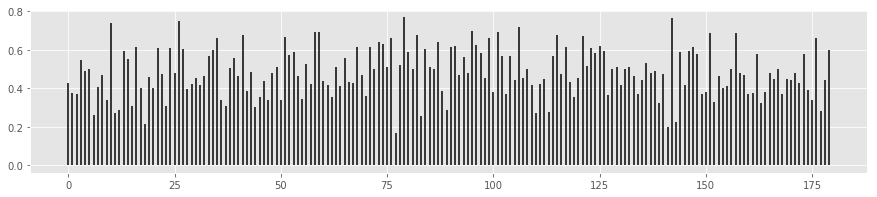

mozghatják 	 mozghatják


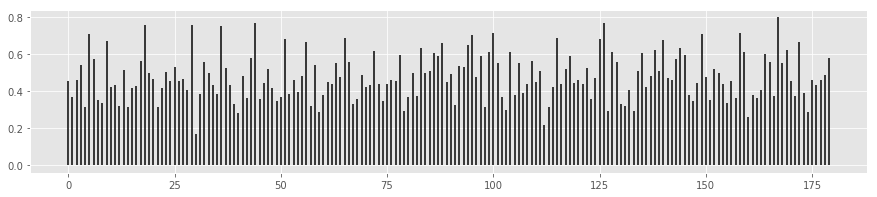

működtetők 	 möködtetők


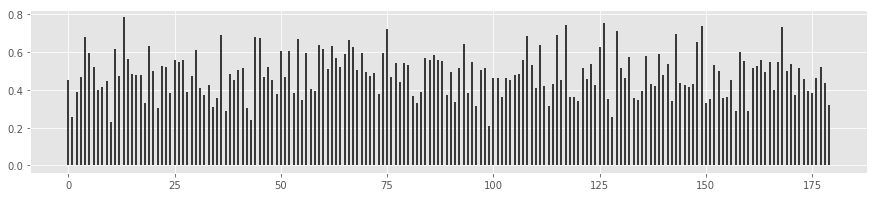

    lénnyé 	     lénnyy


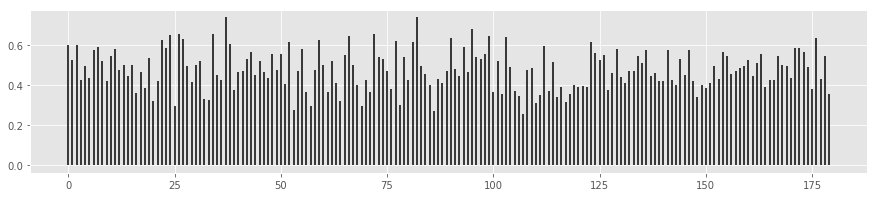

    később 	     késóbb


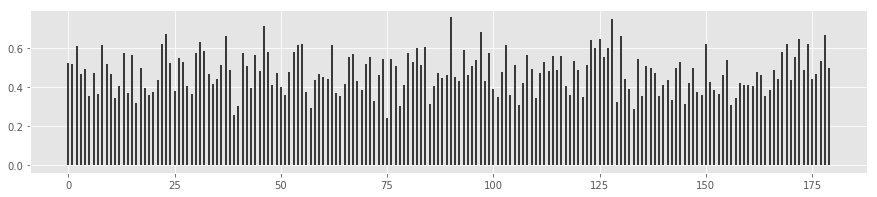

   elhúnyt 	    elhényt


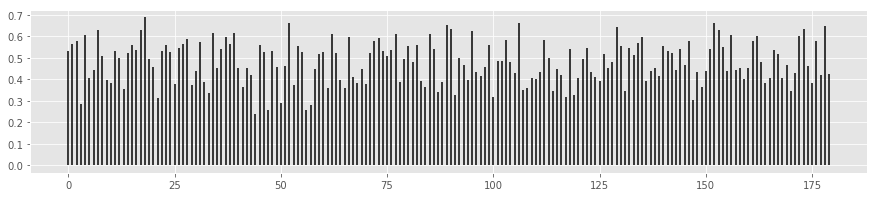

  mutánsok 	   mutánsok


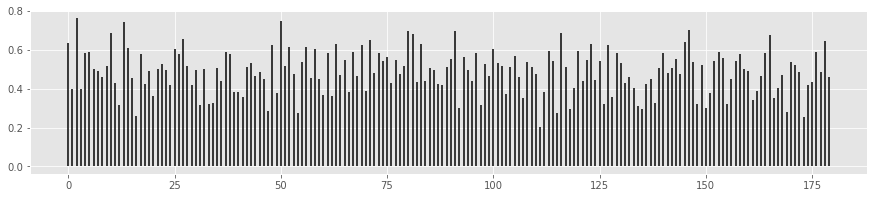

 spolarics 	  spolarius


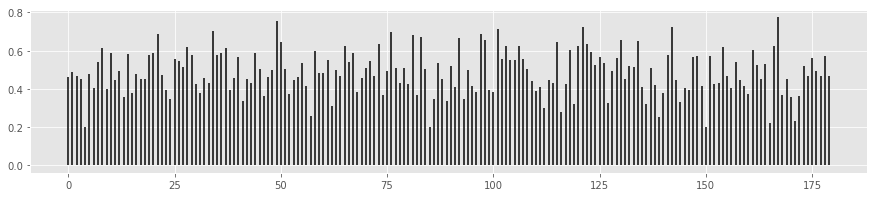

   elkezdi 	    elkezdi


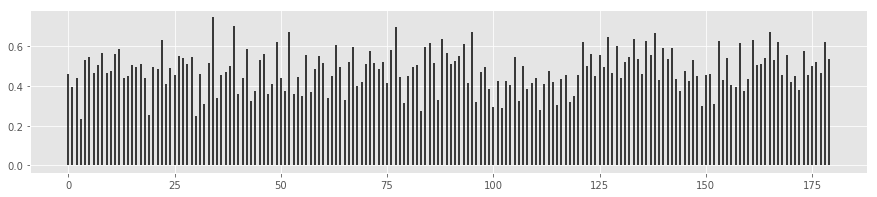

   misiért 	    misiért


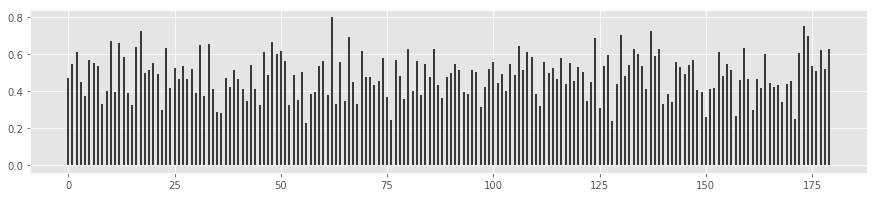

   háztáji 	    háztáji


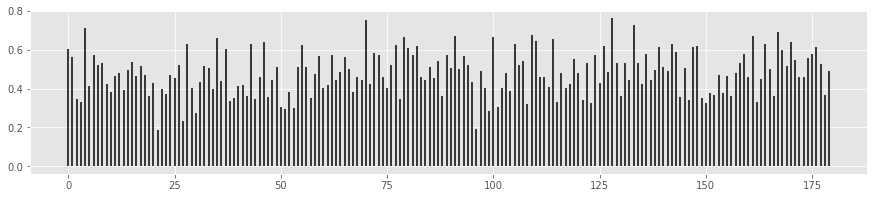

   útjukat 	    ftjukat


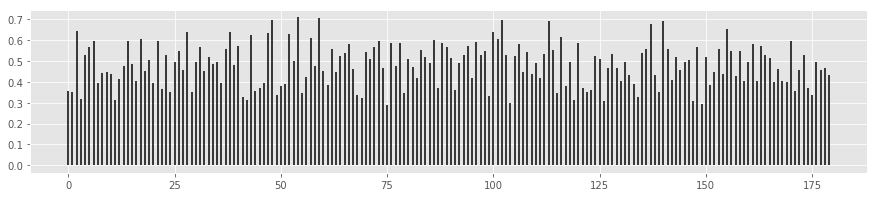

    lakcím 	     lakvum


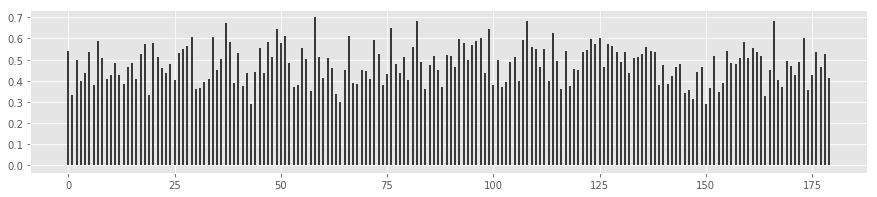

  elhagyja 	   elhagyja


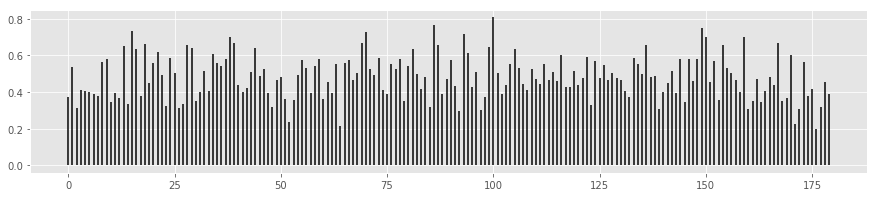

  családja 	   családja


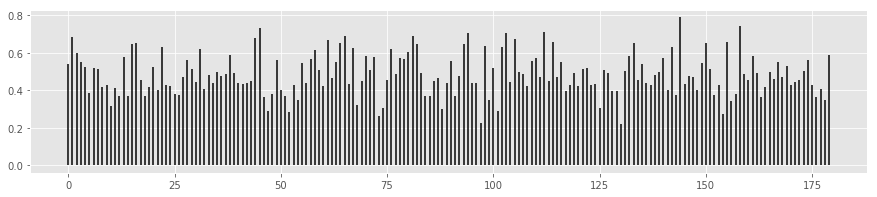

racionális 	 hafionális


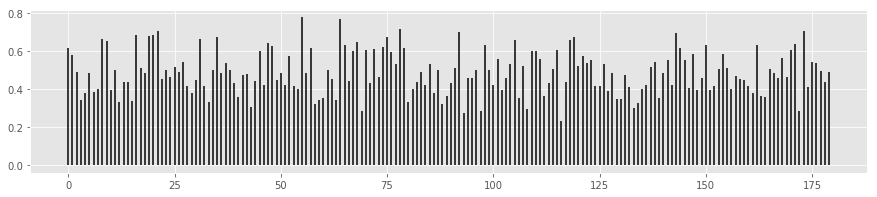

ütemezhető 	 átemezhető


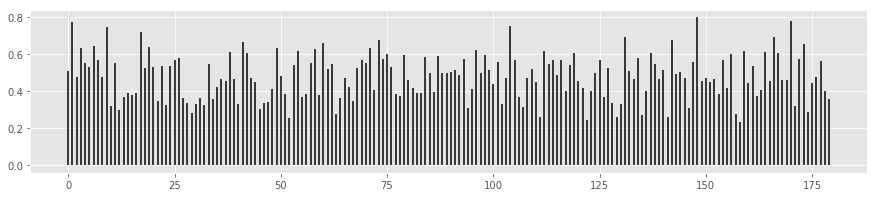

  létforma 	   létforka


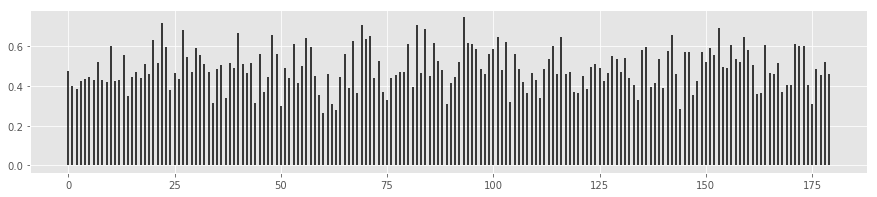

   közéjük 	    közéjük


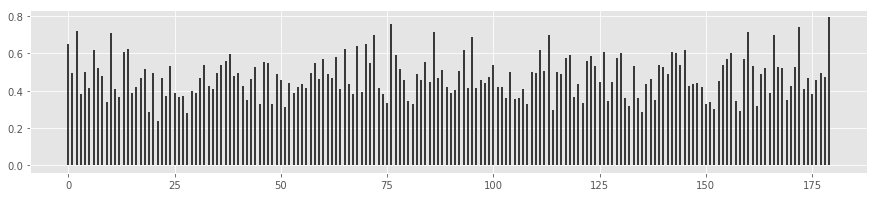

    nyakán 	     nyakán


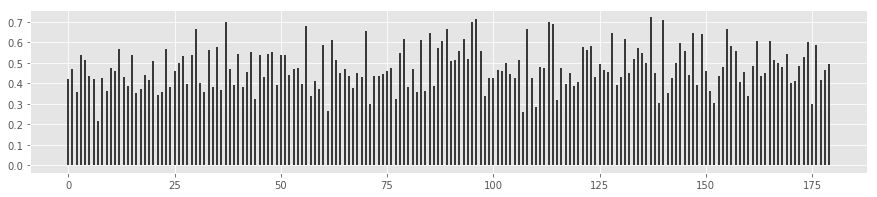

    ráérne 	     ráérne


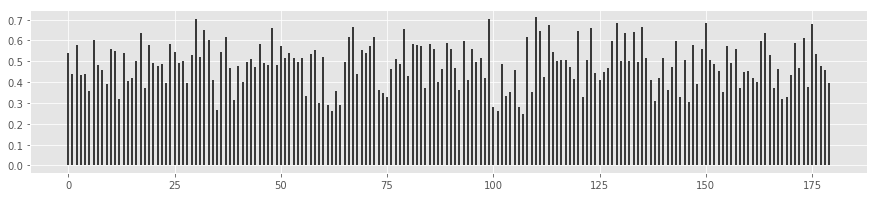

   szparis 	    szparis


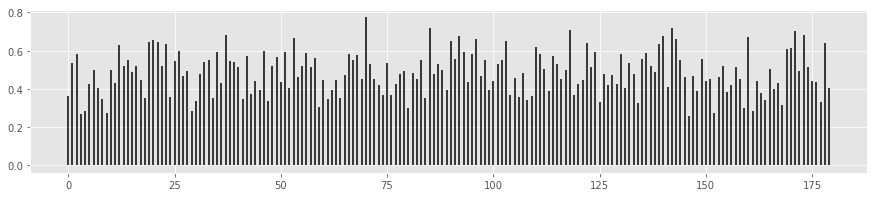

 korlátnál 	  korlátnál


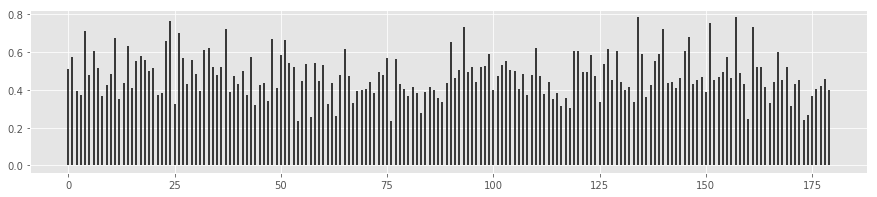

magánéleti 	 magánéleti


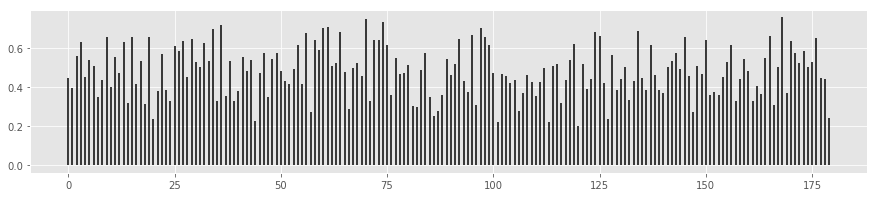

 padmapáni 	  hadmapáni


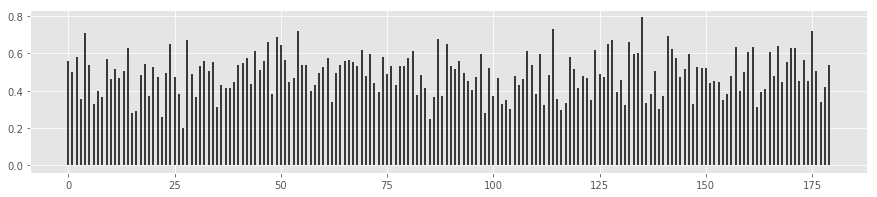

   maratja 	    maratja


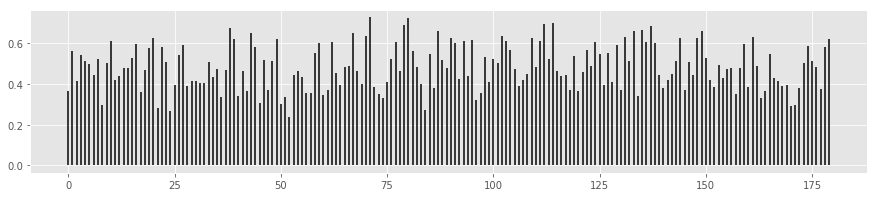

   töltünk 	    töltünk


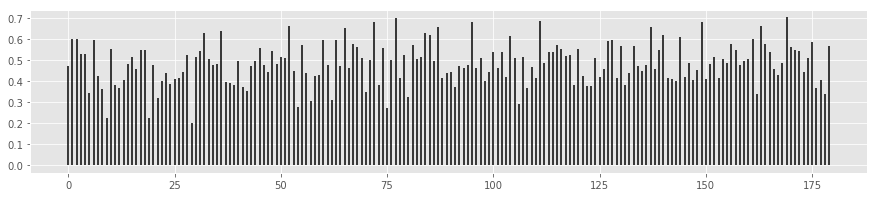

újesztendő 	 fresztendő


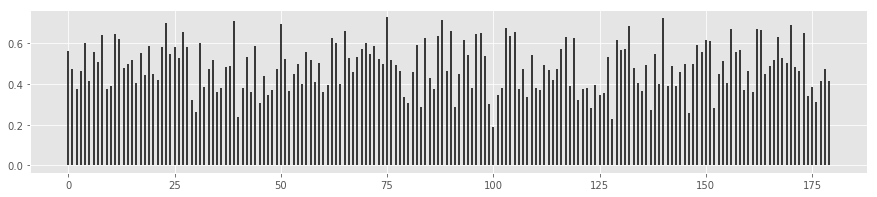

 eltűnésük 	  eltónésük


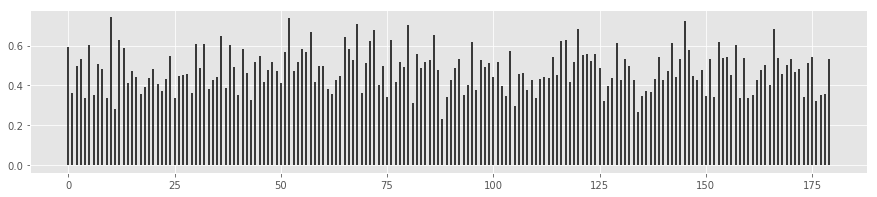

  kötbérek 	   kötbérek


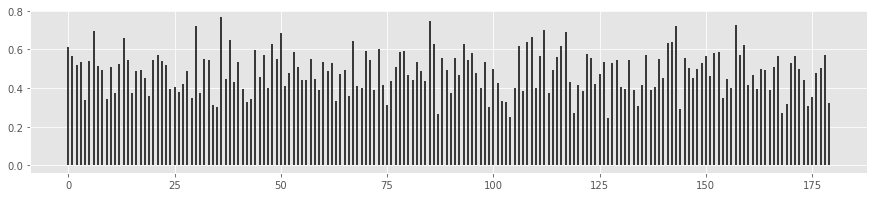

   élénken 	    élénken


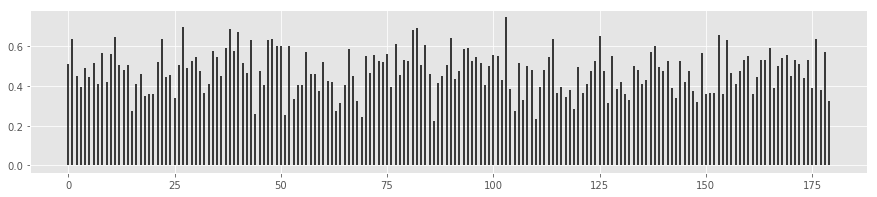

 szegediek 	  szegediek


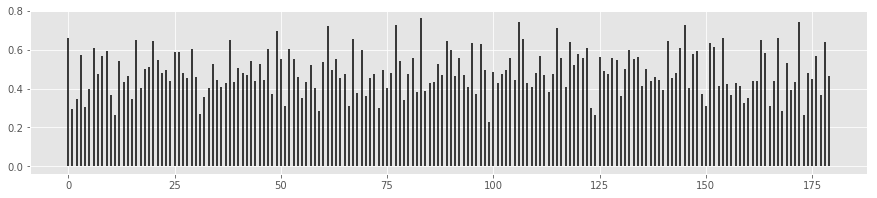

 feldobják 	  feldobják


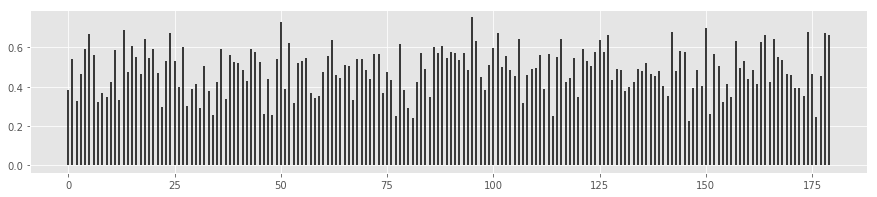

    kenték 	     kenték


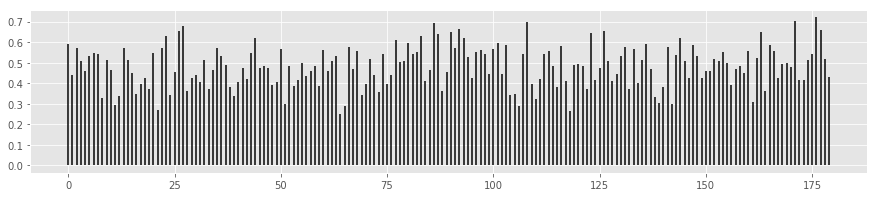

 előkertet 	  előkertet


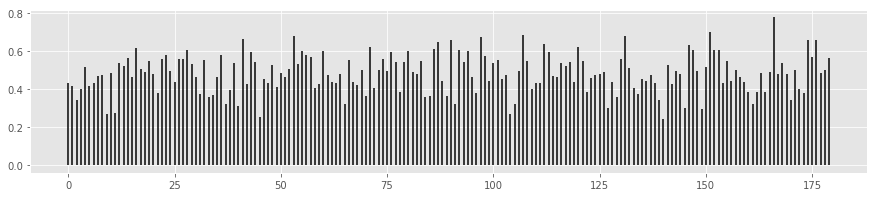

   gyökerű 	    gyökery


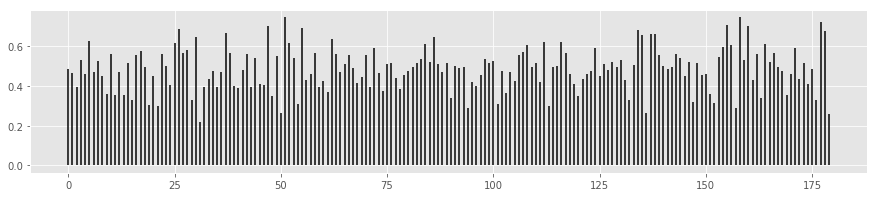

 segítéget 	  segytéget


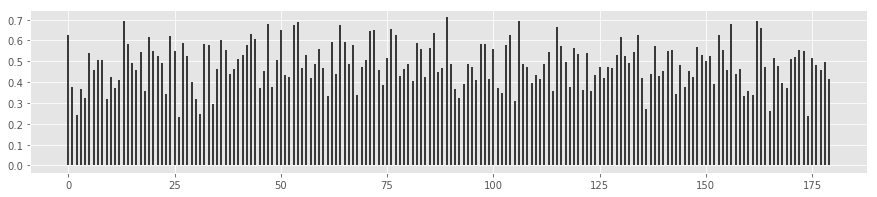

 válthatja 	  válthatja


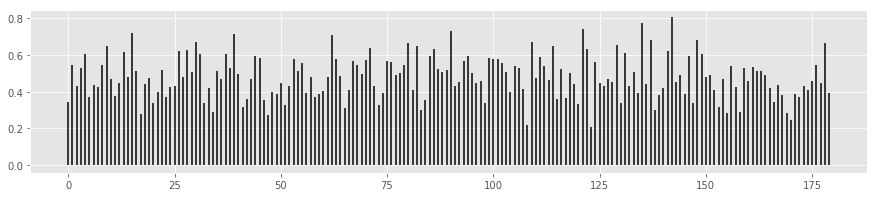

     vénás 	      vénás


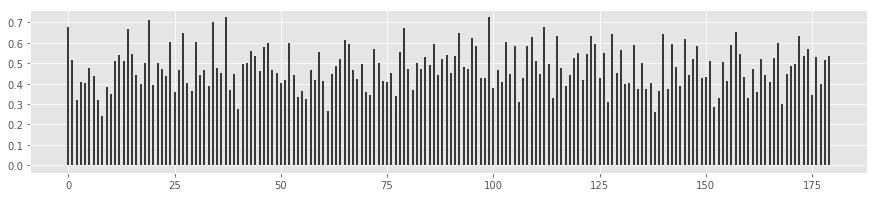

     állot 	      állot


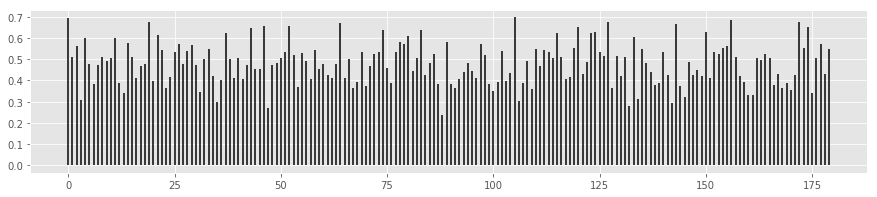

  eltekint 	   eltekint


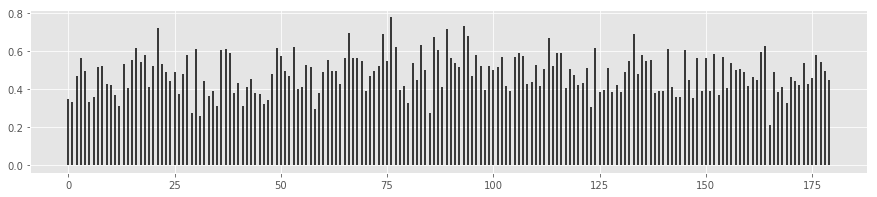

     üzemű 	       zekű


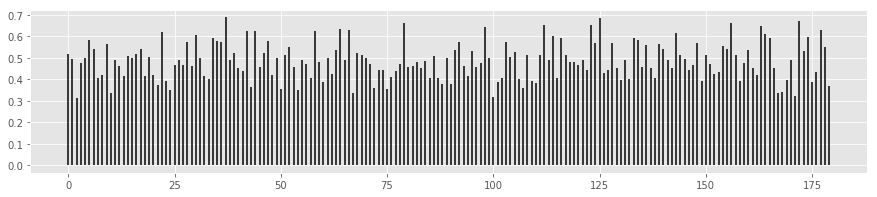

 különösen 	  kölönösen


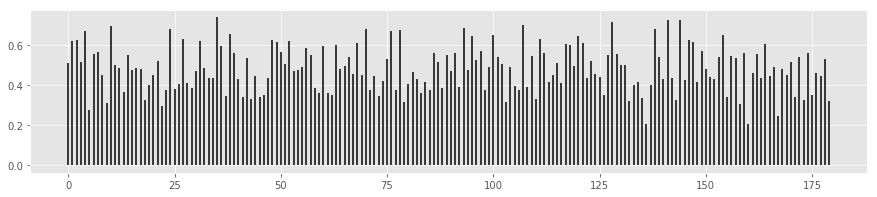

  munkáról 	   munkáról


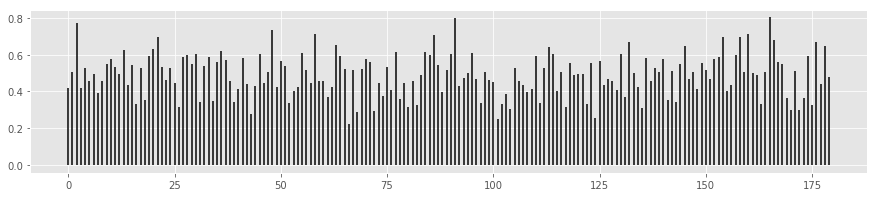

   kezeire 	    kezeire


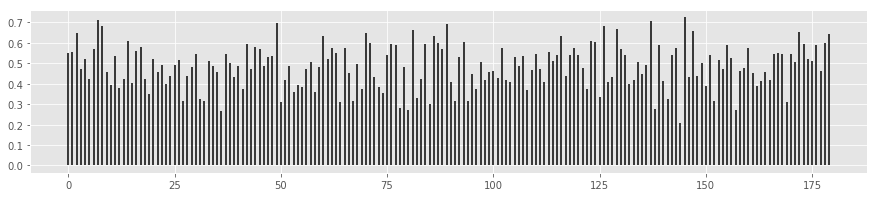

   dotáció 	    dotáció


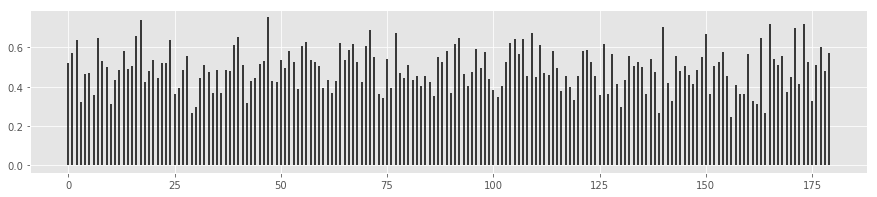

felöltötte 	 felöltötte


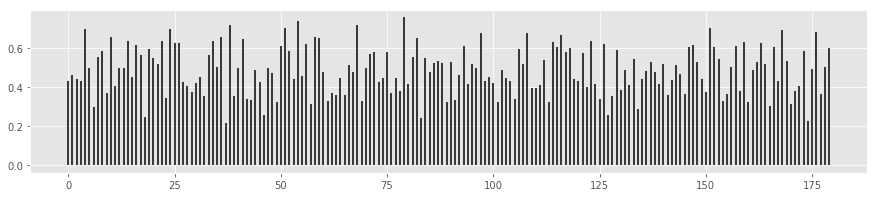

  tagdíját 	   tagdíját


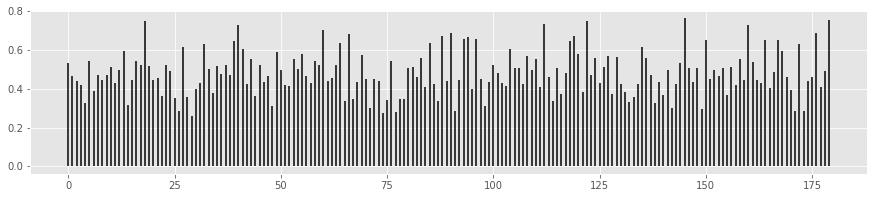

 módszerei 	  mudszerei


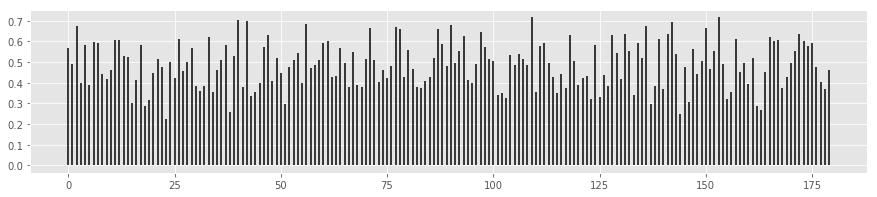

  verssora 	   verssora


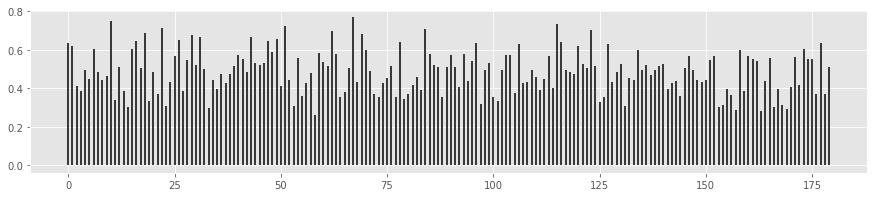

rendelhető 	 rendelhető


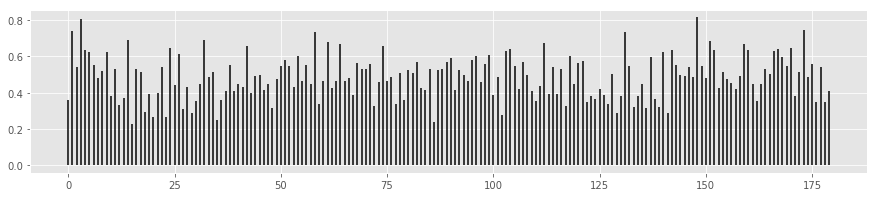

  hajtatni 	   hajtatni


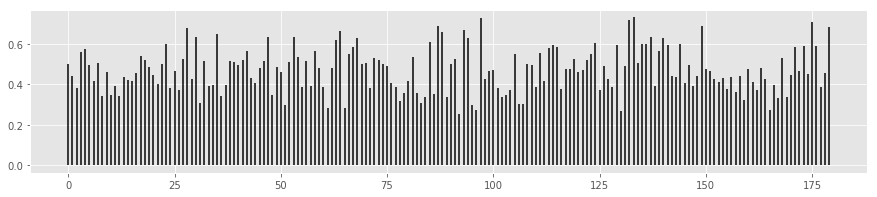

  pincéből 	   pincéből


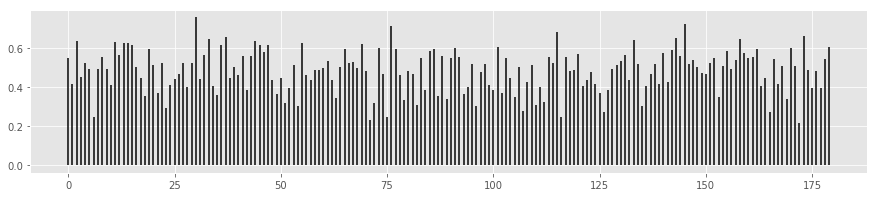

 témahéten 	  témahéten


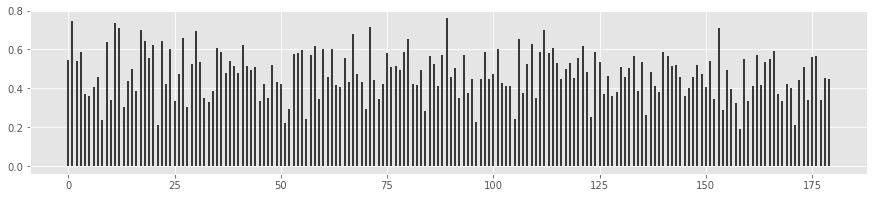

 családjel 	  családjel


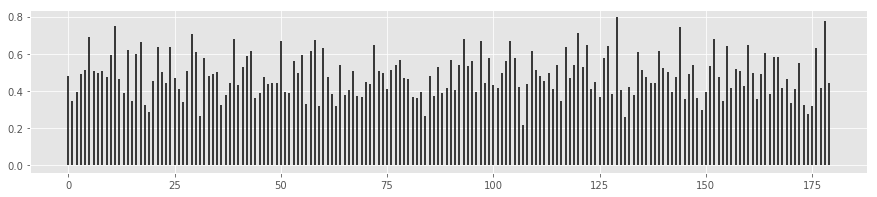

 fedezőmén 	  fedezőmén


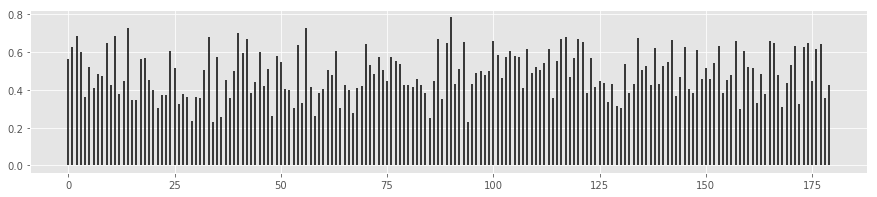

   átalány 	    átalány


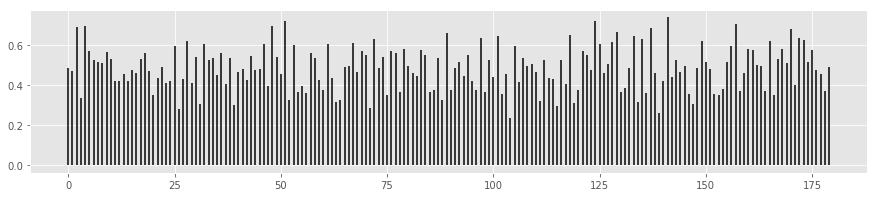

  lenyomja 	   lenyomja


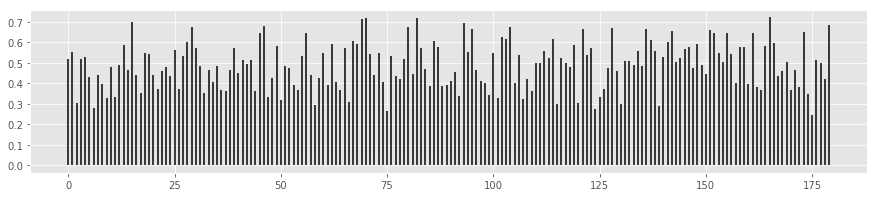

akadályból 	 akadályból


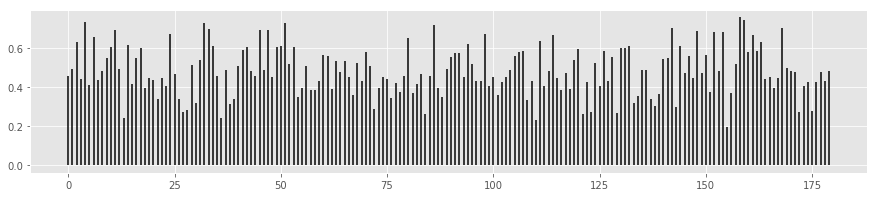

   hapsija 	    hapsija


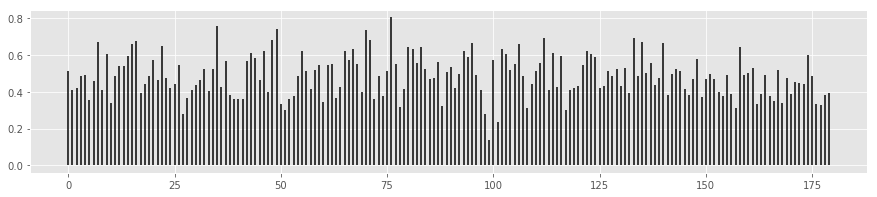

   alkunak 	    alkunak


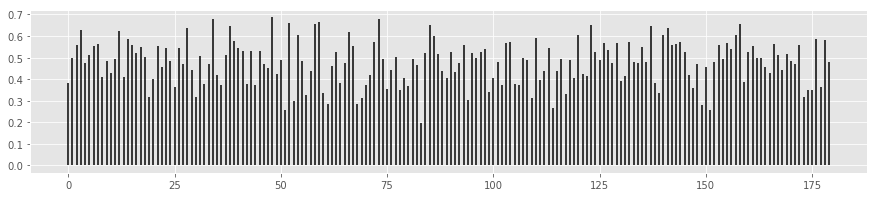


Accuracy on data:  96.31635757040526 %


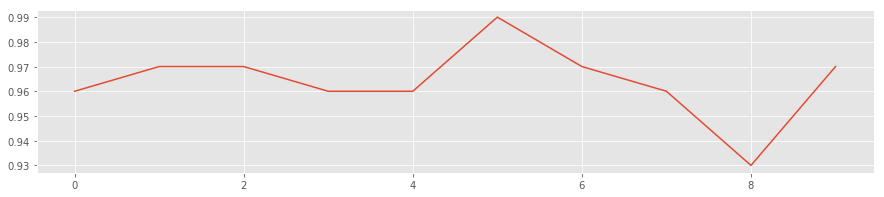

In [4]:
show_performance(encoder,x_test,corp,100)

        eh 	         er


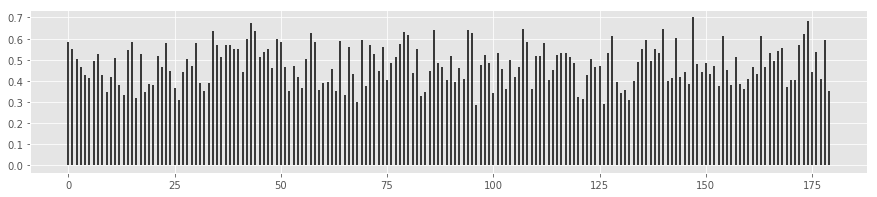

    kecske 	     kecske


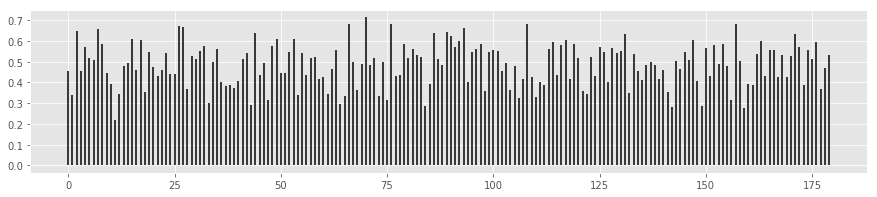

     kutya 	      kutka


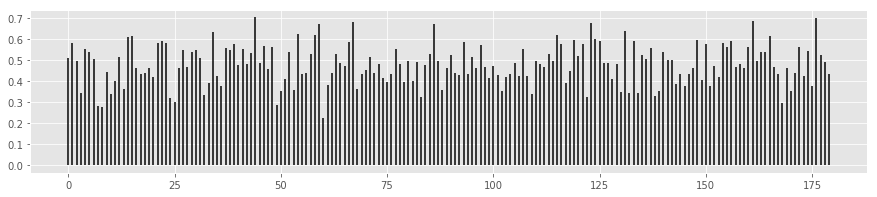

     aytuk 	      aytuk


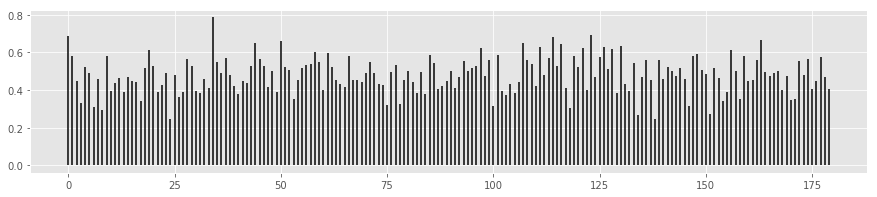

    macska 	     macska


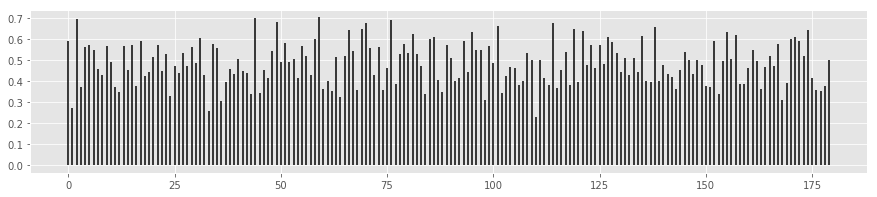

 árvíztűrő 	  árvuztürő


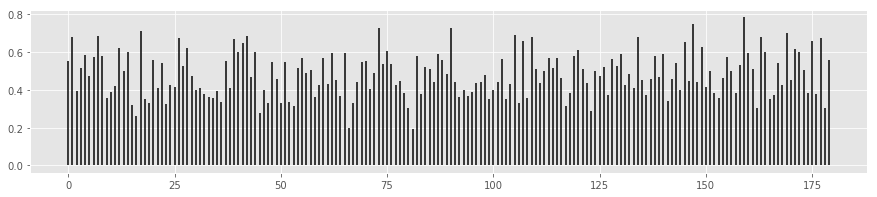

      fúró 	        író


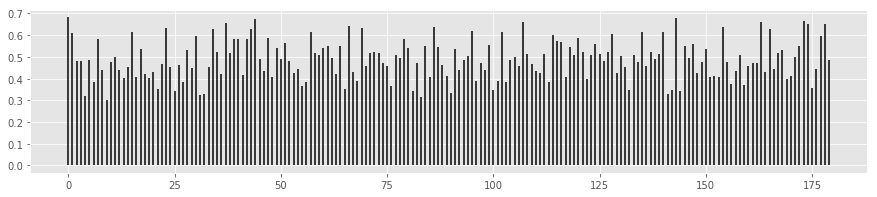

     kacsa 	      kapsa


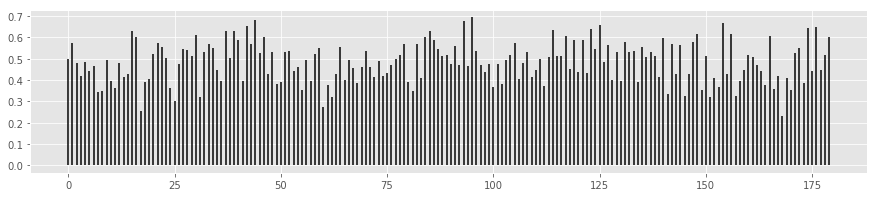

         a 	         ka


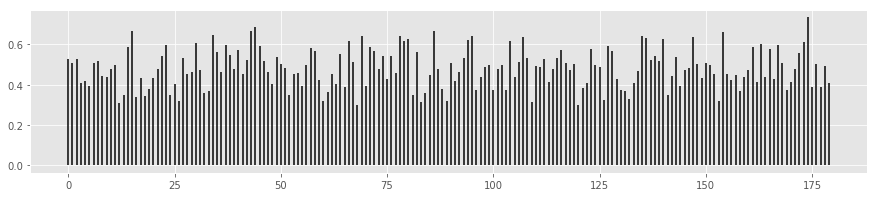

        és 	         és


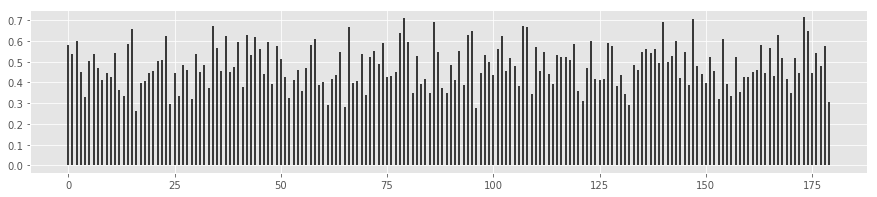


Accuracy on data:  92.0 %


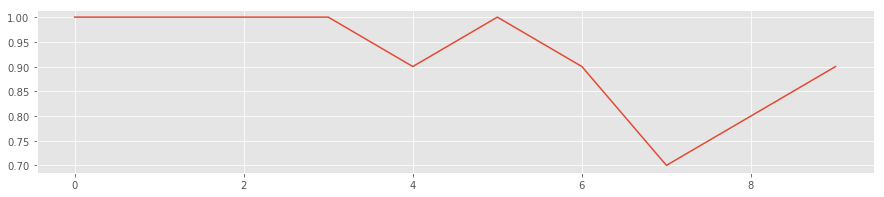

In [5]:
show_performance(encoder,["eh","kecske","kutya","aytuk","macska","árvíztűrő","fúró","kacsa","a","és"],corp)

In [6]:
def decode_critical(enc=180):
    for POS in range(enc):
        encoded=np.ones(enc)
        encoded[POS]=0
        a=encoder.decode([encoded])[0].reshape([10,36])

        b=corp.defeaturize_data_charlevel_onehot([a])
        print(b)